In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:

for column in df.columns[1:-3]:
  df[column].replace(0,np.nan,inplace=True)
  df[column].fillna(round(df[column].mean(skipna=True)),inplace=True);

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


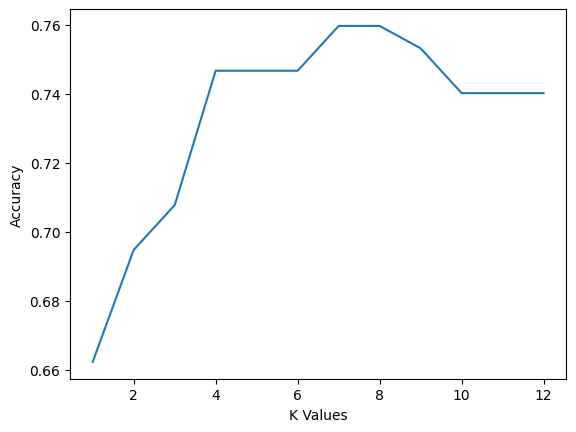

In [8]:
X=df.iloc[:,:8]
Y=df.iloc[:,8:]
     

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
     

X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
     

scores = []
X_train
Y_train
for i in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
     

import matplotlib.pyplot as plt
plt.plot(range(1,13),scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()
     

In [9]:
knn=KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,Y_train)
y_pred = knn.predict(x_test)

print("Accuracy :" ,accuracy_score(y_pred,y_test))
     


Accuracy : 0.7532467532467533


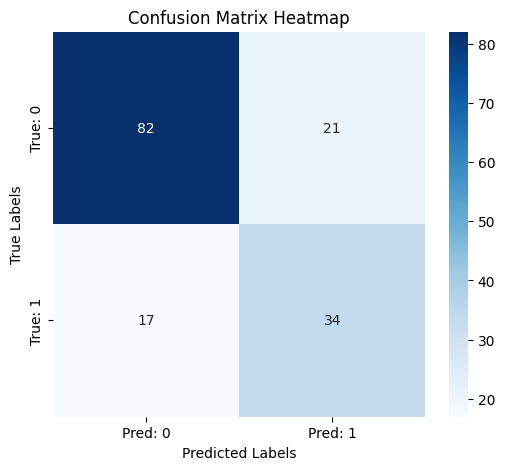

In [10]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [11]:
print("Error Rate:", 1-accuracy_score(y_pred,y_test))
     

Error Rate: 0.24675324675324672


In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.62      0.67      0.64        51

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.76      0.75      0.76       154



In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix:
[[82 17]
 [21 34]]
Accuracy Score: 0.7532467532467533
Recall Score: 0.6181818181818182
Precision Score: 0.6666666666666666
